In [4]:
%matplotlib inline

In [5]:
from pylab import *

In [6]:
from matplotlib.pyplot import figure, plot, xlabel, ylabel, title, show

In [7]:
# connect to a QlikEngine and initialize pyqlikengine
from pyqlikengine import pyqlikengine
url = "ws://localhost:4848/app"
qixe = pyqlikengine.QixEngine(url)


In [8]:
# this section creates an app, loads some data, makes a few selections in a dimension, creates a hypercube, converts the hypercube 
# to a list of columns that we can use to plot a chart
app = qixe.create_app('first_app')
qixe.open_app(app)
qixe.load_script("Load Chr(RecNo()+Ord('A')-1) as AlphaUpper, Chr(RecNo()+Ord('a')-1) as AlphaLower,  RecNo() as Num autogenerate 26;")
qixe.select_in_dimension('AlphaUpper',['A', 'C', 'N'])
hc = qixe.create_hypercube(["AlphaUpper","AlphaLower"], ['=Sum(Num)', '=Avg(Num)', 'Sum(Num)/7'])
mtrx = qixe.convert_hypercube_to_matrix(hc[0], hc[1])

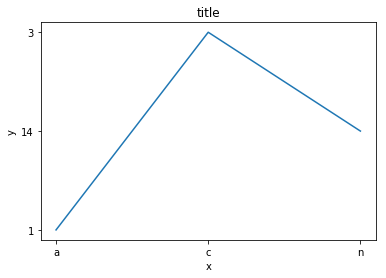

In [9]:
# Plot a chart with matplotlib, based on column 1 (mtrx[1]) and 2 (mtrx[2]) that we create in the previous section
figure()
plot(mtrx[1], mtrx[2])
xlabel('x')
ylabel('y')
title('title')
show()

In [10]:
# in our fist app, we select the complementing values by calling select_excluded on the dimension we first made selections in
qixe.select_excluded_in_dimension("Alpha")
tbl = qixe.convert_hypercube_to_inline_table(hc[0], 'my_table')
print(tbl)

TypeError: string indices must be integers

In [5]:

app2 = qixe.create_app('second_app')
qixe.open_app(app2)
qixe.load_script(tbl)
hc2 = qixe.create_hypercube(["Column0", "Column2"], [])
mtrx2 = qixe.convert_hypercube_to_matrix(hc[0], hc[1])
print(mtrx2)
qixe.delete_app(app2)

[['A', 'C', 'N'], ['a', 'c', 'n'], ['1', '3', '14'], ['1,0000', '3,0000', '14,0000'], ['0,14285714285714', '0,42857142857143', '2']]


True

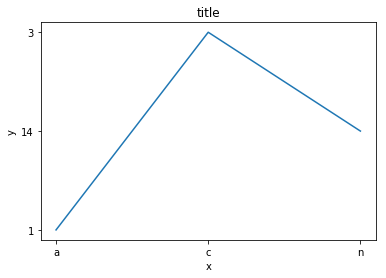

In [6]:
figure()
plot(mtrx[1], mtrx[2])
xlabel('x')
ylabel('y')
title('title')
show()









